In [1]:
import pandas as pd

df = pd.read_csv("data/features_week1.csv")
print("Veri kümesi boyutu:", df.shape)
df.head()

Veri kümesi boyutu: (500, 6)


,area,eccentricity,solidity,contrast,homogeneity,label
0,282.0,0.281054,0.952703,419.849206,0.156262,1
1,239.0,0.790485,0.766026,668.390212,0.100698,0
2,491.0,0.593116,0.883094,393.906085,0.119954,5
3,459.0,0.430866,0.840659,449.125661,0.125594,3
4,51.0,0.324667,0.944444,391.547619,0.302695,7


In [2]:
print(df.isnull().sum())
print("\nEtiket dağılımı:")
print(df['label'].value_counts())

area            0
eccentricity    0
solidity        0
contrast        0
homogeneity     0
label           0
dtype: int64

Etiket dağılımı:
label
6    97
3    92
1    90
7    74
2    44
4    39
5    34
0    30
Name: count, dtype: int64


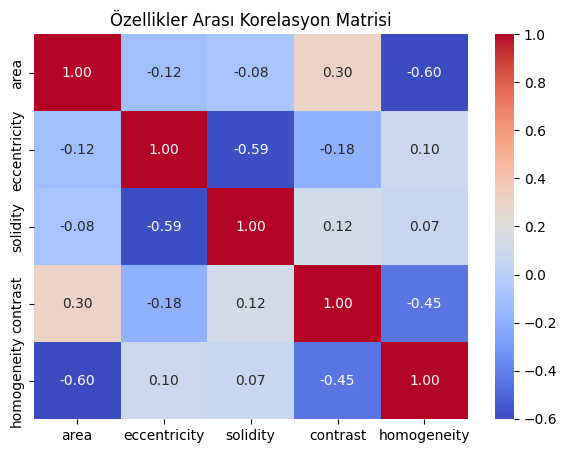

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(df.drop(columns=["label"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Eğitim veri sayısı: {len(X_train)}")
print(f"Test veri sayısı: {len(X_test)}")


Eğitim veri sayısı: 375
Test veri sayısı: 125


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model eğitimi tamamlandı.")


✅ Model eğitimi tamamlandı.


              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.69      0.39      0.50        23
           2       0.50      0.45      0.48        11
           3       0.32      0.52      0.39        23
           4       0.45      0.50      0.48        10
           5       0.00      0.00      0.00         8
           6       0.37      0.46      0.41        24
           7       0.88      0.79      0.83        19

    accuracy                           0.48       125
   macro avg       0.46      0.44      0.44       125
weighted avg       0.50      0.48      0.48       125



C:\Users\Tamer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tamer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tamer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_clas

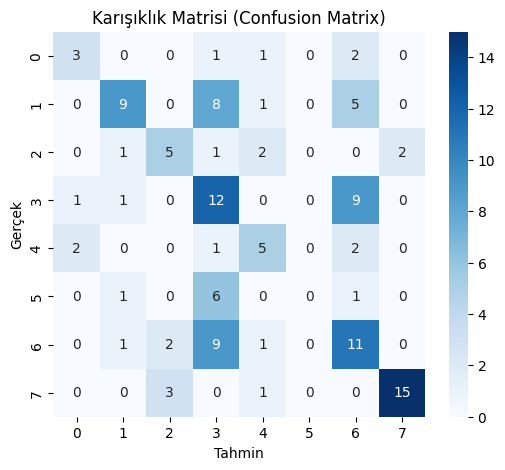

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Karışıklık Matrisi (Confusion Matrix)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()


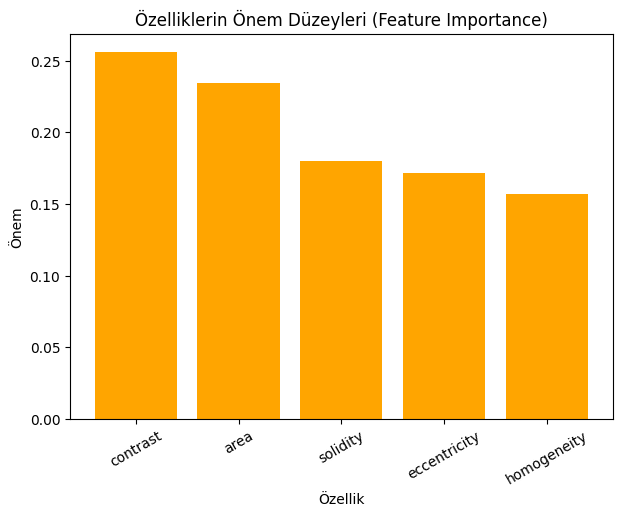

In [7]:
import numpy as np

importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(7,5))
plt.bar(features[sorted_idx], importances[sorted_idx], color="orange")
plt.title("Özelliklerin Önem Düzeyleri (Feature Importance)")
plt.xlabel("Özellik")
plt.ylabel("Önem")
plt.xticks(rotation=30)
plt.show()
